In [14]:
import pandas as pd
import pybedtools
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming you have seaborn installed for improved plotting aesthetics

In [15]:
# Create the dataframes
df1 = pd.DataFrame({
    'CHR1': ['chr1', 'chr2', 'chr3', 'chr3', 'chr1', 'chr5', 'chr7', 'chr8', 'chr9', 'chr1'],
    'start1': [100, 150, 120, 150, 199, 89, 90, 101, 123, 130],
    'end1': [200, 200, 300, 250, 300, 231, 287, 250, 299, 299]
})


df2 = pd.DataFrame({
    'CHR2': ['chr1', 'chr2', 'chr3', 'chr3', 'chr1', 'chr5', 'chr7', 'chr8', 'chr9', 'chr1'],
    'start2': [105, 170, 200, 183, 202, 100, 100, 110, 139, 272],
    'end2': [106, 171, 201, 184, 203, 101, 101, 111, 140, 273]
})


In [16]:
df1


CHR1  start1  end1
0  chr1     100   200
1  chr2     150   200
2  chr3     120   300
3  chr3     150   250
4  chr1     199   300
5  chr5      89   231
6  chr7      90   287
7  chr8     101   250
8  chr9     123   299
9  chr1     130   299

In [17]:
df2

CHR2  start2  end2
0  chr1     105   106
1  chr2     170   171
2  chr3     200   201
3  chr3     183   184
4  chr1     202   203
5  chr5     100   101
6  chr7     100   101
7  chr8     110   111
8  chr9     139   140
9  chr1     272   273

In [18]:
# Convert dataframes to BedTool objects
bedtool_df1 = pybedtools.BedTool.from_dataframe(df1)
bedtool_df2 = pybedtools.BedTool.from_dataframe(df2)

In [19]:
# Merge the BedTools based on overlapping genomic coordinates
merged_bedtool = bedtool_df1.intersect(bedtool_df2, wo=True)

In [22]:
# Convert the result back to a dataframe
merged_df = pd.read_table(merged_bedtool.fn, header=None, names=['chr1', 'start1', 'end1', 'chr2', 'start2', 'end2', 'overlap'])

In [27]:
# Deduplicate based on relevant columns
merged_df = merged_df.drop_duplicates(subset=['chr1', 'start1', 'end1', 'chr2', 'start2', 'end2'])
merged_df

chr1  start1  end1  chr2  start2  end2  overlap  center1  center2  \
0   chr1     100   200  chr1     105   106        1      150      105   
1   chr2     150   200  chr2     170   171        1      175      170   
2   chr3     120   300  chr3     200   201        1      210      200   
3   chr3     120   300  chr3     183   184        1      210      183   
4   chr3     150   250  chr3     200   201        1      200      200   
5   chr3     150   250  chr3     183   184        1      200      183   
6   chr1     199   300  chr1     202   203        1      249      202   
7   chr1     199   300  chr1     272   273        1      249      272   
8   chr5      89   231  chr5     100   101        1      160      100   
9   chr7      90   287  chr7     100   101        1      188      100   
10  chr8     101   250  chr8     110   111        1      175      110   
11  chr9     123   299  chr9     139   140        1      211      139   
12  chr1     130   299  chr1     202   203        1      214      202   
13  chr1     130   299  chr1     272   273        1      214      272   

    Distance from CBS  
0                  45  
1                   5  
2                  10  
3                  27  
4                   0  
5                  17  
6                  47  
7                 -23  
8                  60  
9                  88  
10                 65  
11                 72  
12                 12  
13                -58

In [23]:
# Calculate the center positions
merged_df['center1'] = (merged_df['start1'] + merged_df['end1']) // 2
merged_df['center2'] = merged_df['start2']

In [24]:
# Calculate the distance from CBS as the difference of center1 and start2
merged_df['Distance from CBS'] = merged_df['center1'] - merged_df['center2']

In [25]:
# Group by 'chr1', 'Distance from CBS' and count the number of mutations
mutation_counts = merged_df.groupby(['chr1', 'Distance from CBS']).size().reset_index(name='Number of Mutation')

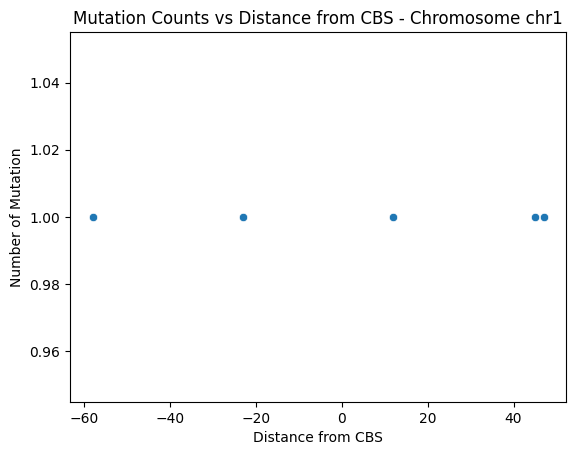

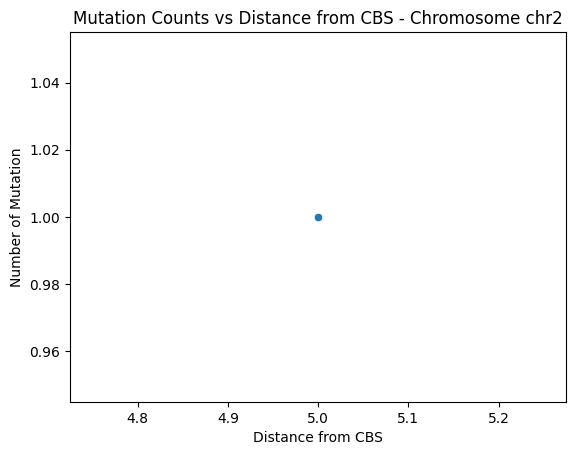

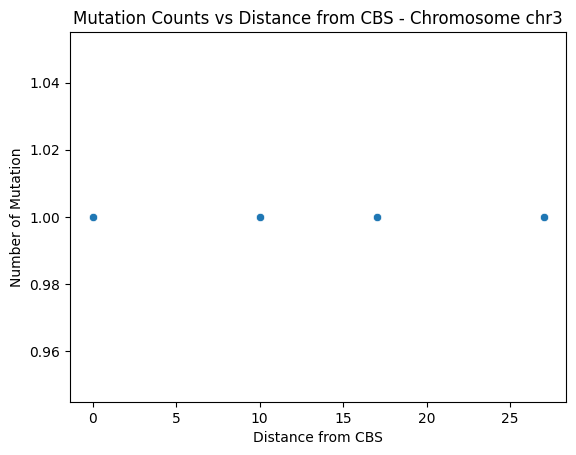

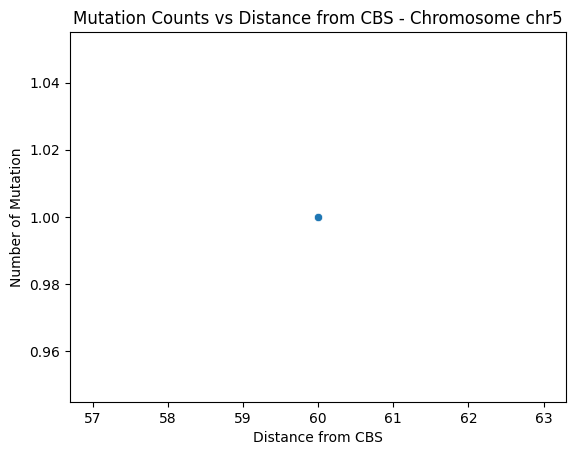

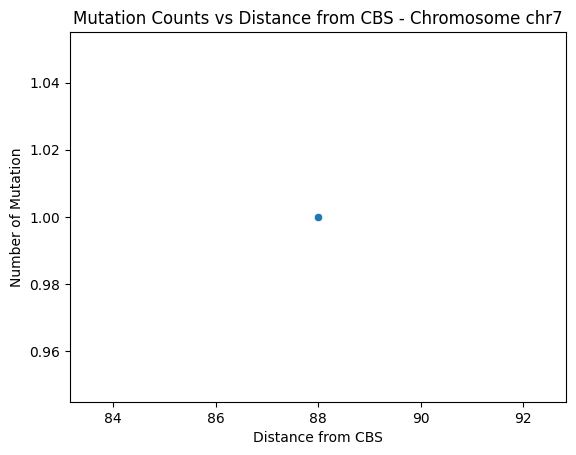

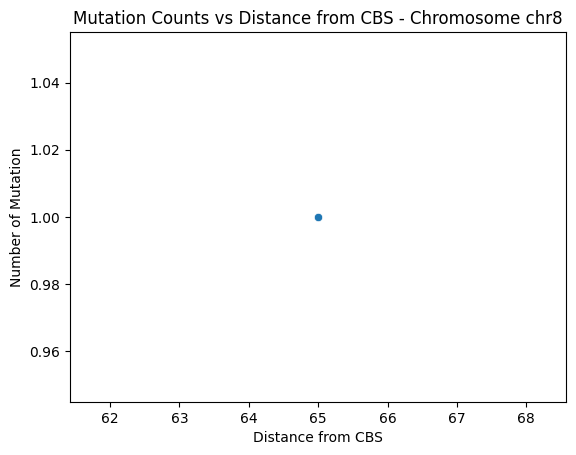

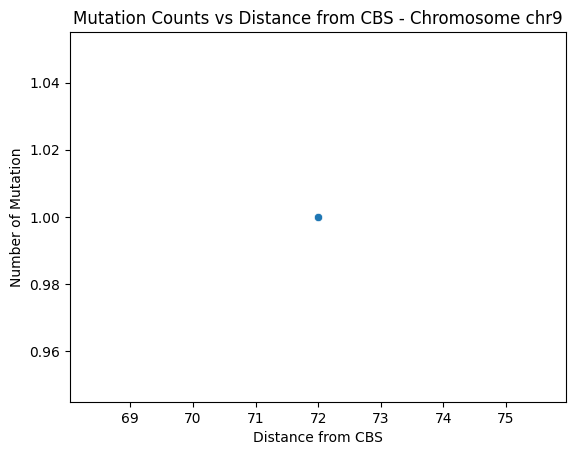

In [26]:
# Scatter plot for each chromosome separately
for chr_name, chr_group in mutation_counts.groupby('chr1'):
    plt.figure()
    sns.scatterplot(x='Distance from CBS', y='Number of Mutation', data=chr_group)
    plt.xlabel('Distance from CBS')
    plt.ylabel('Number of Mutation')
    plt.title(f'Mutation Counts vs Distance from CBS - Chromosome {chr_name}')
    plt.show()